# Elections South Africa Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, f1_score, accuracy_score


import warnings
warnings.filterwarnings("ignore")

In [84]:
data = pd.read_excel('National.xlsx', engine='openpyxl',  skiprows=[0])

In [85]:
data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,NaN,Party Name,NaN,NaN,NaN,Abbr,NaN,Eastern Cape,Free State,Gauteng,KwaZulu-Natal,Limpopo,NaN,Mpumalanga,North West,NaN,Northern Cape,Western Cape,Total
1,NaN,#HOPE4SA,NaN,NaN,NaN,NaN,#HOPE4SA,485,609,1049,332,154,NaN,291,195,NaN,1211,1103,5429
2,NaN,ABANTU BATHO CONGRESS,NaN,NaN,NaN,NaN,ABC,114,72,50,234,22,NaN,32,36,NaN,79,120,759
3,NaN,ABLE LEADERSHIP,NaN,NaN,NaN,NaN,AL,100,26,35,25,258,NaN,32,35,NaN,42,51,604
4,NaN,ACTION ALLIANCE DEVELOPMENT PARTY,NaN,NaN,NaN,NaN,AADP,77,18,302,21,266,NaN,32,16,NaN,31,69,832


In [93]:
data.drop('Unnamed: 0', axis = 1, inplace = True)
data.head()

,Unnamed: 1,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 13,Unnamed: 14,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,Party Name,Eastern Cape,Free State,Gauteng,KwaZulu-Natal,Limpopo,Mpumalanga,North West,Northern Cape,Western Cape,Total
1,#HOPE4SA,485,609,1049,332,154,291,195,1211,1103,5429
2,ABANTU BATHO CONGRESS,114,72,50,234,22,32,36,79,120,759
3,ABLE LEADERSHIP,100,26,35,25,258,32,35,42,51,604
4,ACTION ALLIANCE DEVELOPMENT PARTY,77,18,302,21,266,32,16,31,69,832


In [94]:
data.head()

,Unnamed: 1,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 13,Unnamed: 14,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,Party Name,Eastern Cape,Free State,Gauteng,KwaZulu-Natal,Limpopo,Mpumalanga,North West,Northern Cape,Western Cape,Total
1,#HOPE4SA,485,609,1049,332,154,291,195,1211,1103,5429
2,ABANTU BATHO CONGRESS,114,72,50,234,22,32,36,79,120,759
3,ABLE LEADERSHIP,100,26,35,25,258,32,35,42,51,604
4,ACTION ALLIANCE DEVELOPMENT PARTY,77,18,302,21,266,32,16,31,69,832


In [105]:
data.rename({"Unnamed: 1":"Party Name"}, axis="columns", inplace=True)
data.head()

,Party Name,Eastern Cape,Free State,Gauteng,KwaZulu-Natal,Limpopo,Mpumalanga,North West,Northern Cape,Western Cape,Total
0,Party Name,Eastern Cape,Free State,Gauteng,KwaZulu-Natal,Limpopo,Mpumalanga,North West,Northern Cape,Western Cape,Total
1,#HOPE4SA,485,609,1049,332,154,291,195,1211,1103,5429
2,ABANTU BATHO CONGRESS,114,72,50,234,22,32,36,79,120,759
3,ABLE LEADERSHIP,100,26,35,25,258,32,35,42,51,604
4,ACTION ALLIANCE DEVELOPMENT PARTY,77,18,302,21,266,32,16,31,69,832


In [106]:
data = data.iloc[1:]
data.head()

,Party Name,Eastern Cape,Free State,Gauteng,KwaZulu-Natal,Limpopo,Mpumalanga,North West,Northern Cape,Western Cape,Total
1,#HOPE4SA,485,609,1049,332,154,291,195,1211,1103,5429
2,ABANTU BATHO CONGRESS,114,72,50,234,22,32,36,79,120,759
3,ABLE LEADERSHIP,100,26,35,25,258,32,35,42,51,604
4,ACTION ALLIANCE DEVELOPMENT PARTY,77,18,302,21,266,32,16,31,69,832
5,ACTIONSA,2033,758,9871,548,743,772,854,1265,1577,18421


In [107]:
data.tail()

,Party Name,Eastern Cape,Free State,Gauteng,KwaZulu-Natal,Limpopo,Mpumalanga,North West,Northern Cape,Western Cape,Total
58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,Spoilt Votes,5716,2516,3376,4100,1594,2889,1741,3785,4898,30615
61,Total Votes Cast,403629,168782,372465,233381,127529,177099,90434,259277,476445,2309041
62,Registered Population,"3,439,320","1,456,927","6,541,978","5,738,249","2,779,657","2,025,070","1,768,576","656,826","3,317,072","27,782,477"


In [115]:
data = data.drop([ 53])
data.tail()

,Party Name,Eastern Cape,Free State,Gauteng,KwaZulu-Natal,Limpopo,Mpumalanga,North West,Northern Cape,Western Cape,Total
52,XILUVA,59,24,70,38,9,27,11,58,61,357
57,Total Valid Votes,397913,166266,369089,229281,125935,174210,88693,NaN,471547,2278426
60,Spoilt Votes,5716,2516,3376,4100,1594,2889,1741,3785,4898,30615
61,Total Votes Cast,403629,168782,372465,233381,127529,177099,90434,259277,476445,2309041
62,Registered Population,"3,439,320","1,456,927","6,541,978","5,738,249","2,779,657","2,025,070","1,768,576","656,826","3,317,072","27,782,477"


In [116]:
data.isnull().sum()

Party Name       0
Eastern Cape     0
Free State       0
Gauteng          0
KwaZulu-Natal    0
Limpopo          0
Mpumalanga       0
North West       0
Northern Cape    1
Western Cape     0
Total            0
dtype: int64

In [117]:
data = data.replace(np.nan, 0)

In [118]:
data.isnull().sum()

Party Name       0
Eastern Cape     0
Free State       0
Gauteng          0
KwaZulu-Natal    0
Limpopo          0
Mpumalanga       0
North West       0
Northern Cape    0
Western Cape     0
Total            0
dtype: int64

In [119]:
data.to_excel("electionsClean.xlsx")  

In [121]:
data_clean = pd.read_excel('electionsClean.xlsx', engine='openpyxl')
data_clean.head()

,Unnamed: 0,Party Name,Eastern Cape,Free State,Gauteng,KwaZulu-Natal,Limpopo,Mpumalanga,North West,Northern Cape,Western Cape,Total
0,1,#HOPE4SA,485,609,1049,332,154,291,195,1211,1103,5429
1,2,ABANTU BATHO CONGRESS,114,72,50,234,22,32,36,79,120,759
2,3,ABLE LEADERSHIP,100,26,35,25,258,32,35,42,51,604
3,4,ACTION ALLIANCE DEVELOPMENT PARTY,77,18,302,21,266,32,16,31,69,832
4,5,ACTIONSA,2033,758,9871,548,743,772,854,1265,1577,18421


In [122]:
data_clean .drop('Unnamed: 0', axis = 1, inplace = True)
data_clean .head()

,Party Name,Eastern Cape,Free State,Gauteng,KwaZulu-Natal,Limpopo,Mpumalanga,North West,Northern Cape,Western Cape,Total
0,#HOPE4SA,485,609,1049,332,154,291,195,1211,1103,5429
1,ABANTU BATHO CONGRESS,114,72,50,234,22,32,36,79,120,759
2,ABLE LEADERSHIP,100,26,35,25,258,32,35,42,51,604
3,ACTION ALLIANCE DEVELOPMENT PARTY,77,18,302,21,266,32,16,31,69,832
4,ACTIONSA,2033,758,9871,548,743,772,854,1265,1577,18421


In [123]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Party Name     56 non-null     object
 1   Eastern Cape   56 non-null     object
 2   Free State     56 non-null     object
 3   Gauteng        56 non-null     object
 4   KwaZulu-Natal  56 non-null     object
 5   Limpopo        56 non-null     object
 6   Mpumalanga     56 non-null     object
 7   North West     56 non-null     object
 8   Northern Cape  56 non-null     object
 9   Western Cape   56 non-null     object
 10  Total          56 non-null     object
dtypes: object(11)
memory usage: 4.9+ KB


In [124]:
data_clean.duplicated().sum()

0

In [125]:
cat = []
num = []
for i in data_clean.columns:
  if data_clean[i].dtype == 'object':
    cat.append(i)
  else:
    num.append(i)

In [126]:
cat

['Party Name',
 'Eastern Cape',
 'Free State',
 'Gauteng',
 'KwaZulu-Natal',
 'Limpopo',
 'Mpumalanga',
 'North West',
 'Northern Cape',
 'Western Cape',
 'Total']

In [127]:
print(num)

[]


In [128]:
num

[]

In [129]:
data_clean.head()

,Party Name,Eastern Cape,Free State,Gauteng,KwaZulu-Natal,Limpopo,Mpumalanga,North West,Northern Cape,Western Cape,Total
0,#HOPE4SA,485,609,1049,332,154,291,195,1211,1103,5429
1,ABANTU BATHO CONGRESS,114,72,50,234,22,32,36,79,120,759
2,ABLE LEADERSHIP,100,26,35,25,258,32,35,42,51,604
3,ACTION ALLIANCE DEVELOPMENT PARTY,77,18,302,21,266,32,16,31,69,832
4,ACTIONSA,2033,758,9871,548,743,772,854,1265,1577,18421


In [131]:
data_clean.describe()

,Party Name,Eastern Cape,Free State,Gauteng,KwaZulu-Natal,Limpopo,Mpumalanga,North West,Northern Cape,Western Cape,Total
count,56,56,56,56,56,56,56,56,56,56,56
unique,56,54,52,55,54,48,50,49,53,52,56
top,#HOPE4SA,29,16,100,25,9,32,35,73,51,5429
freq,1,2,3,2,2,3,5,2,2,3,1


In [142]:
data_clean.head()

,Party Name,Eastern Cape,Free State,Gauteng,KwaZulu-Natal,Limpopo,Mpumalanga,North West,Northern Cape,Western Cape,Total
0,#HOPE4SA,485,609,1049,332,154,291,195,1211,1103,5429
1,ABANTU BATHO CONGRESS,114,72,50,234,22,32,36,79,120,759
2,ABLE LEADERSHIP,100,26,35,25,258,32,35,42,51,604
3,ACTION ALLIANCE DEVELOPMENT PARTY,77,18,302,21,266,32,16,31,69,832
4,ACTIONSA,2033,758,9871,548,743,772,854,1265,1577,18421


In [153]:
top_10 = data['KwaZulu-Natal'].value_counts().head(10)
top_10

25       2
39       2
332      1
175      1
31       1
118      1
40454    1
59       1
2063     1
20       1
Name: KwaZulu-Natal, dtype: int64

In [154]:
data_clean.describe().transpose

<bound method DataFrame.transpose of        Party Name  Eastern Cape  Free State  Gauteng  KwaZulu-Natal  Limpopo  \
count          56            56          56       56             56       56   
unique         56            54          52       55             54       48   
top      #HOPE4SA            29          16      100             25        9   
freq            1             2           3        2              2        3   

        Mpumalanga  North West  Northern Cape  Western Cape  Total  
count           56          56             56            56     56  
unique          50          49             53            52     56  
top             32          35             73            51   5429  
freq             5           2              2             3      1  >

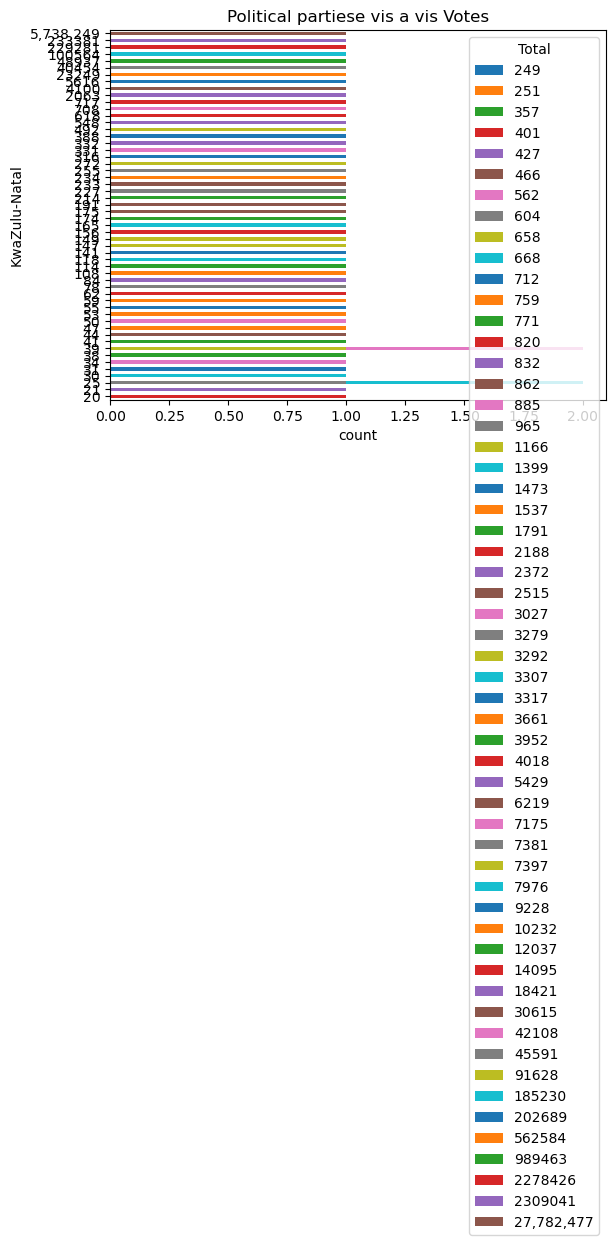

In [164]:
pk = round(pd.crosstab(data_clean['KwaZulu-Natal'], data_clean['Total']), 2)
pk.plot.barh(stacked = True)
plt.xlabel('count')
plt.title('Political partiese vis a vis Votes');